#E-Commerce Customer Cohort and Retention Analysis.

#### **Objective:** To analyze customer behavior over time by grouping them into monthly cohorts to identify trends in user retention and churn.

##### **Tech Stack:** PySpark (Data Cleaning), Spark SQL (Transformation), Matplotlib/Seaborn (Visualization).

##### **Business Impact:** Identifying which months have the highest churn allows marketing teams to target specific user segments for re-engagement.

## Step 1: Load the Raw Sales Data into a Spark DataFrame
### What this step does:
We load the CSV file containing all sales transactions into a Spark DataFrame.

header=True tells Spark that the first row contains column names.

inferSchema=True automatically detects the correct data types (string, integer, double, etc.).

Once loaded, display(df) lets us preview the data and confirm that it loaded correctly.

In [0]:
df = spark.read.csv(
    "/Volumes/workspace/default/cohort_data/sales.csv",
    header=True,
    inferSchema=True
)

display(df)


order_id order_date status item_id sku qty_ordered price discount_amount category payment_method bi_st cust_id year month ref_num Name Prefix First Name Middle Initial Last Name Gender age full_name E Mail Customer Since SSN Phone No. Place Name County City State Zip Region User Name 100354678 1/10/2020 received 574772 oasis_Oasis-064-36 21 89.9 0.0 Men's Fashion cod Valid 60124 2020 20-Oct 987867 Drs. Jani W Titus F 43 Titus, Jani jani.titus@gmail.com 2006-08-22 627-31-5251 405-959-1129 Vinson Harmon Vinson OK 73571 South jwtitus 100354678 1/10/2020 received 574774 Fantastic_FT-48 11 19.0 0.0 Men's Fashion cod Valid 60124 2020 20-Oct 987867 Drs. Jani W Titus F 43 Titus, Jani jani.titus@gmail.com 2006-08-22 627-31-5251 405-959-1129 Vinson Harmon Vinson OK 73571 South jwtitus 100354680 1/10/2020 complete 574777 mdeal_DMC-610-8 9 149.9 0.0 Men's Fashion cod Net 60124 2020 20-Oct 987867 Drs. Jani W Titus F 43 Titus, Jani jani.titus@gmail.com 2006-08-22 627-31-5251 405-959-1129 Vinson Harmon Vinson OK 73571 South jwtitus 100354680 1/10/2020 complete 574779 oasis_Oasis-061-36 9 79.9 0.0 Men's Fashion cod Net 60124 2020 20-Oct 987867 Drs. Jani W Titus F 43 Titus, Jani jani.titus@gmail.com 2006-08-22 627-31-5251 405-959-1129 Vinson Harmon Vinson OK 73571 South jwtitus 100367357 13-11-2020 received 595185 MEFNAR59C38B6CA08CD 2 99.9 0.0 Men's Fashion cod Valid 60124 2020 20-Nov 987867 Drs. Jani W Titus F 43 Titus, Jani jani.titus@gmail.com 2006-08-22 627-31-5251 405-959-1129 Vinson Harmon Vinson OK 73571 South jwtitus 100367357 13-11-2020 received 595186 MEFBUY59B7C3DDC2CA3-42 2 39.9 0.0 Men's Fashion cod Valid 60124 2020 20-Nov 987867 Drs. Jani W Titus F 43 Titus, Jani jani.titus@gmail.com 2006-08-22 627-31-5251 405-959-1129 Vinson Harmon Vinson OK 73571 South jwtitus 100367360 13-11-2020 order_refunded 595192 MATDAN59C3C845B38F0 2 47.6 0.0 Mobiles & Tablets cod Valid 60124 2020 20-Nov 987867 Drs. Jani W Titus F 43 Titus, Jani jani.titus@gmail.com 2006-08-22 627-31-5251 405-959-1129 Vinson Harmon Vinson OK 73571 South jwtitus 100354677 1/10/2020 canceled 574769 GFE_19_USBLEDLight 2 49.0 0.0 Mobiles & Tablets Payaxis Gross 42485 2020 20-Oct 171143 Prof. Lee S Eaker M 28 Eaker, Lee lee.eaker@gmail.com 1981-02-04 185-86-4345 239-335-6755 Graham Bradford Graham FL 32042 South lseaker 100354677 1/10/2020 canceled 574770 oasis_Kingston-32GB-DTIG4 2 135.0 0.0 Computing Payaxis Gross 42485 2020 20-Oct 171143 Prof. Lee S Eaker M 28 Eaker, Lee lee.eaker@gmail.com 1981-02-04 185-86-4345 239-335-6755 Graham Bradford Graham FL 32042 South lseaker 100354677 1/10/2020 canceled 574771 Geepas_GSB5420 2 549.9 0.0 Appliances Payaxis Gross 42485 2020 20-Oct 171143 Prof. Lee S Eaker M 28 Eaker, Lee lee.eaker@gmail.com 1981-02-04 185-86-4345 239-335-6755 Graham Bradford Graham FL 32042 South lseaker 100356116 8/10/2020 order_refunded 577467 Geepas_GSB5420 1 549.9 0.0 Appliances Payaxis Valid 42485 2020 20-Oct 171143 Prof. Lee S Eaker M 28 Eaker, Lee lee.eaker@gmail.com 1981-02-04 185-86-4345 239-335-6755 Graham Bradford Graham FL 32042 South lseaker 100358724 21-10-2020 order_refunded 581862 APPGEE59ADBEEE2EB9D 1 549.9 0.0 Appliances cod Valid 42485 2020 20-Oct 171143 Prof. Lee S Eaker M 28 Eaker, Lee lee.eaker@gmail.com 1981-02-04 185-86-4345 239-335-6755 Graham Bradford Graham FL 32042 South lseaker 100403034 24-12-2020 canceled 656937 APPWES59CA4D59CB41A 2 254.8 39.80628 Appliances Easypay Gross 42485 2020 20-Dec 171143 Prof. Lee S Eaker M 28 Eaker, Lee lee.eaker@gmail.com 1981-02-04 185-86-4345 239-335-6755 Graham Bradford Graham FL 32042 South lseaker 100403034 24-12-2020 canceled 656938 APPPHI5A09939191938 2 315.5 49.28917 Appliances Easypay Gross 42485 2020 20-Dec 171143 Prof. Lee S Eaker M 28 Eaker, Lee lee.eaker@gmail.com 1981-02-04 185-86-4345 239-335-6755 Graham Bradford Graham FL 32042 South lseaker 100403034 24-12-2020 canceled 656939 HALSHO59F836EF959B9 2 69.8 10.90455 Home & Living Easypay Gross 42485 2020 20-Dec 171143 Prof. Lee S Eaker M 2

## Step 2: Inspect the Column Names
### What this step does:
This prints out all the column names from the DataFrame.
It helps you understand the dataset structure, check for messy or unexpected column names, and identify which fields you’ll need to rename or clean before doing any analysis.

printSchema() wull print out all the column names and their data types.

In [0]:
print(df.columns)
df.printSchema()


['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered', 'price', 'discount_amount', 'category', 'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num', 'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender', 'age', 'full_name', 'E Mail', 'Customer Since', 'SSN', 'Phone No. ', 'Place Name', 'County', 'City', 'State', 'Zip', 'Region', 'User Name']
root
 |-- order_id: string (nullable = true)
 |-- order_date: string (nullable = true)
 |-- status: string (nullable = true)
 |-- item_id: integer (nullable = true)
 |-- sku: string (nullable = true)
 |-- qty_ordered: integer (nullable = true)
 |-- price: double (nullable = true)
 |-- discount_amount: double (nullable = true)
 |-- category: string (nullable = true)
 |-- payment_method: string (nullable = true)
 |-- bi_st: string (nullable = true)
 |-- cust_id: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- ref_num: integer (nullable = true)
 |-- Name

## Step 3: Parse order_date into a Real Date (Handle Mixed Formats)
### What this step does:
Convert order_date from messy strings (e.g., 1/10/2020, 13-11-2020) into a proper date so Spark can group by month and compute cohorts without errors.

In [0]:
from pyspark.sql import functions as F
from pyspark.sql.functions import col, date_trunc

df_active = (
    df
    # renames (safe even if not present; but later columns must match)
    .withColumnRenamed("cust_id", "customer_id")
    .withColumnRenamed("qty_ordered", "quantity")
    .withColumnRenamed("price", "total_sales")
    .withColumnRenamed("Customer Since", "customer_since")

    # normalize raw order_date
    .withColumn("order_raw", col("order_date").cast("string"))
    .withColumn("order_raw", F.regexp_replace("order_raw", r"\s+", ""))      # remove spaces
    .withColumn("order_raw", F.regexp_replace("order_raw", r"[./]", "-"))    # turn / or . into -

    # parse using ONLY patterns (no try_to_date)
    .withColumn(
        "order_date",
        F.coalesce(
            F.to_date("order_raw", "d-M-yyyy"),    # 13-11-2020
            F.to_date("order_raw", "M-d-yyyy"),    # 1-10-2020
            F.to_date("order_raw", "d-MMM-yyyy"),  # 13-Nov-2020
            F.to_date("order_raw", "yyyy-M-d"),    # 2020-11-13
            F.to_date("order_raw", "yyyy-MM-dd")   # 2020-11-13
        )
    )

    .filter(F.lower(col("status")).isin("complete", "received"))
    .withColumn("order_month", F.to_date(date_trunc("month", col("order_date"))))
    .drop("order_raw")
)

display(df_active.select("customer_id", "order_date", "order_month", "status").limit(10))


customer_id order_date order_month status 60124 2020-10-01 2020-10-01 received 60124 2020-10-01 2020-10-01 received 60124 2020-10-01 2020-10-01 complete 60124 2020-10-01 2020-10-01 complete 60124 2020-11-13 2020-11-01 received 60124 2020-11-13 2020-11-01 received 42485 2020-12-24 2020-12-01 complete 42485 2020-12-24 2020-12-01 complete 42485 2020-12-24 2020-12-01 complete 42485 2020-12-28 2020-12-01 complete

## Step 4: Identify Each Customer’s First Purchase (Cohort Assignment)
### What this step does:
This step determines the first time each customer ever made a purchase, which is essential for cohort analysis.

We use this first purchase date to assign every customer to a cohort month, meaning the month they became a customer.

####Why this matters:
- Cohort analysis groups customers by when they first became active.
- This allows us to track retention behavior over time and compare how different cohorts perform.
####What we do:

- Group orders by customer_id
- Find the earliest order_date for each customer 
- Convert that date into a cohort_month by truncating it to the month level 
- Store cohort_month as a date to ensure consistency in later calculations
 
The resulting table contains one row per customer, representing the cohort they belong to.

In [0]:
from pyspark.sql.functions import min, date_trunc, col
from pyspark.sql import functions as F
from pyspark.sql.functions import col, min, date_trunc

# Find first order date per customer
first_purchase = (
    df_active.groupBy("customer_id")
    .agg(min("order_date").alias("first_order_date"))
    .withColumn("cohort_month", F.to_date(date_trunc("month", col("first_order_date"))))
)

# Assign cohort month
first_purchase = first_purchase.withColumn(
    "cohort_month",
    date_trunc("month", col("first_order_date"))
)

display(first_purchase.limit(10))

customer_id first_order_date cohort_month 60198 2020-10-01 2020-10-01T00:00:00.000Z 58149 2020-10-26 2020-10-01T00:00:00.000Z 41431 2020-10-03 2020-10-01T00:00:00.000Z 52050 2020-10-29 2020-10-01T00:00:00.000Z 61799 2020-11-06 2020-11-01T00:00:00.000Z 18444 2020-10-24 2020-10-01T00:00:00.000Z 23774 2021-04-16 2021-04-01T00:00:00.000Z 60620 2020-10-09 2020-10-01T00:00:00.000Z 61269 2020-10-22 2020-10-01T00:00:00.000Z 49458 2020-10-04 2020-10-01T00:00:00.000Z

## Step 5: Combine Cohort Information With Orders and Calculate Months Since First Purchase
### What this step does:
This step attaches each customer’s cohort month (their first purchase month) back onto all of their later orders.
Then we calculate how many months have passed since the customer’s cohort start date for each order.
This is what allows us to track retention month‑by‑month.
#### Breakdown:

- We join df_active (all valid customer orders) with first_purchase (each customer’s first-ever order date and cohort month).
- After the join, every order row contains the customer’s cohort month.
- We then use months_between(order_month, cohort_month) to calculate how far along in the retention timeline the customer is:
                0 = first month (cohort month)
 
                1 = month after cohort
 
                2 = two months after cohort
                
                and so on…


This field (months_since_cohort) is the core of all retention calculations.

In [0]:
from pyspark.sql.functions import col, months_between

# Join active orders with first_purchase information
df_cohort = (
    df_active
        .join(first_purchase, on="customer_id", how="inner")
)

# Calculate months since cohort
df_cohort = df_cohort.withColumn(
    "months_since_cohort",
    months_between(col("order_month"), col("cohort_month")).cast("int")
)

display(df_cohort.select(
    "customer_id",
    "order_month",
    "cohort_month",
    "months_since_cohort"
).limit(10))


customer_id order_month cohort_month months_since_cohort 60198 2020-10-01 2020-10-01T00:00:00.000Z 0 58149 2020-11-01 2020-10-01T00:00:00.000Z 1 41431 2020-10-01 2020-10-01T00:00:00.000Z 0 52050 2021-09-01 2020-10-01T00:00:00.000Z 11 61799 2021-05-01 2020-11-01T00:00:00.000Z 6 18444 2020-10-01 2020-10-01T00:00:00.000Z 0 23774 2021-04-01 2021-04-01T00:00:00.000Z 0 60620 2020-10-01 2020-10-01T00:00:00.000Z 0 61269 2020-10-01 2020-10-01T00:00:00.000Z 0 49458 2020-10-01 2020-10-01T00:00:00.000Z 0

## Step 6: Calculate Cohort Size (Number of Customers in Each Cohort)
### What this step does:
In this step, we determine how many unique customers belong to each cohort.
A “cohort” is defined by the month a customer made their first-ever purchase.
#### Breakdown:

- First, we select only customer_id and cohort_month and remove duplicates so that each customer appears once per cohort.
- Then we count how many distinct customers belong to each cohort_month.
- This gives us the baseline cohort size, which will act as the denominator when calculating retention rates later.

A larger cohort means more customers joined in that month; a smaller cohort means fewer people became new customers.


In [0]:
from pyspark.sql.functions import countDistinct

# One row per customer per cohort
customers_per_cohort = (
    df_cohort
        .select("customer_id", "cohort_month")
        .dropDuplicates()
)

# Cohort size table
cohort_size = (
    customers_per_cohort
        .groupBy("cohort_month")
        .agg(countDistinct("customer_id").alias("cohort_size"))
        .orderBy("cohort_month")
)

display(cohort_size.limit(20))

cohort_month cohort_size 2020-10-01T00:00:00.000Z 1817 2020-11-01T00:00:00.000Z 2518 2020-12-01T00:00:00.000Z 14014 2021-01-01T00:00:00.000Z 2370 2021-02-01T00:00:00.000Z 1410 2021-03-01T00:00:00.000Z 4173 2021-04-01T00:00:00.000Z 6958 2021-05-01T00:00:00.000Z 2301 2021-06-01T00:00:00.000Z 2838 2021-07-01T00:00:00.000Z 1413 2021-08-01T00:00:00.000Z 1172 2021-09-01T00:00:00.000Z 1103

## Step 7: Count Active Customers by Cohort and Month Index
### What this step does:
For each cohort and each month after a customer’s first purchase, we count how many distinct customers made a purchase. This gives us the numerator for retention (i.e., “how many came back in month N?”). We first ensure one record per customer per month, then aggregate to get active_customers for every (cohort_month, months_since_cohort) pair.


In [0]:
from pyspark.sql.functions import countDistinct

# Count distinct customers active in each month since their cohort month
active_by_month = (
    df_cohort
        .select("customer_id", "cohort_month", "months_since_cohort")
        .dropDuplicates()
        .groupBy("cohort_month", "months_since_cohort")
        .agg(countDistinct("customer_id").alias("active_customers"))
        .orderBy("cohort_month", "months_since_cohort")
)

display(active_by_month.limit(20))

cohort_month months_since_cohort active_customers 2020-10-01T00:00:00.000Z 0 1817 2020-10-01T00:00:00.000Z 1 304 2020-10-01T00:00:00.000Z 2 378 2020-10-01T00:00:00.000Z 3 167 2020-10-01T00:00:00.000Z 4 122 2020-10-01T00:00:00.000Z 5 175 2020-10-01T00:00:00.000Z 6 149 2020-10-01T00:00:00.000Z 7 88 2020-10-01T00:00:00.000Z 8 141 2020-10-01T00:00:00.000Z 9 84 2020-10-01T00:00:00.000Z 10 53 2020-10-01T00:00:00.000Z 11 78 2020-11-01T00:00:00.000Z 0 2518 2020-11-01T00:00:00.000Z 1 561 2020-11-01T00:00:00.000Z 2 212 2020-11-01T00:00:00.000Z 3 136 2020-11-01T00:00:00.000Z 4 205 2020-11-01T00:00:00.000Z 5 180 2020-11-01T00:00:00.000Z 6 106 2020-11-01T00:00:00.000Z 7 188

## Step 8: Calculate Retention Rate for Each Cohort and Month
### What this step does:
Now that we have:

cohort_size → how many customers started in each cohort (denominator)

active_by_month → how many returned in each month (numerator)

We join these two tables and compute the retention rate:
retention_rate = active_customers / cohort_size

This gives us the percentage of customers who came back in each month since their first purchase.
Month 0 should always be 1.0 (100%) because every customer is “active” in their first month.

In [0]:
from pyspark.sql.functions import col

# Join cohort sizes with active customers
retention = (
    active_by_month
        .join(cohort_size, on="cohort_month", how="inner")
        .withColumn(
            "retention_rate",
            col("active_customers") / col("cohort_size")
        )
        .orderBy("cohort_month", "months_since_cohort")
)

display(retention.limit(20))

cohort_month months_since_cohort active_customers cohort_size retention_rate 2020-10-01T00:00:00.000Z 0 1817 1817 1.0 2020-10-01T00:00:00.000Z 1 304 1817 0.16730875068794718 2020-10-01T00:00:00.000Z 2 378 1817 0.20803522289488166 2020-10-01T00:00:00.000Z 3 167 1817 0.09190974133186572 2020-10-01T00:00:00.000Z 4 122 1817 0.06714364336818933 2020-10-01T00:00:00.000Z 5 175 1817 0.09631260319207485 2020-10-01T00:00:00.000Z 6 149 1817 0.08200330214639516 2020-10-01T00:00:00.000Z 7 88 1817 0.048431480462300495 2020-10-01T00:00:00.000Z 8 141 1817 0.07760044028618603 2020-10-01T00:00:00.000Z 9 84 1817 0.04623004953219593 2020-10-01T00:00:00.000Z 10 53 1817 0.029168959823885527 2020-10-01T00:00:00.000Z 11 78 1817 0.04292790313703908 2020-11-01T00:00:00.000Z 0 2518 2518 1.0 2020-11-01T00:00:00.000Z 1 561 2518 0.2227958697378872 2020-11-01T00:00:00.000Z 2 212 2518 0.08419380460683082 2020-11-01T00:00:00.000Z 3 136 2518 0.054011119936457505 2020-11-01T00:00:00.000Z 4 205 2518 0.08141382049245433 2020-11-01T00:00:00.000Z 5 180 2518 0.07148530579825259 2020-11-01T00:00:00.000Z 6 106 2518 0.04209690230341541 2020-11-01T00:00:00.000Z 7 188 2518 0.07466243050039714

## Step 9: Validate Cohort and Order Month Distributions
### What this step does:
This step helps us double‑check that our cohort creation and monthly order grouping worked correctly. Before calculating retention or building visualizations, we quickly inspect:

 1. How many customers are in each cohort month
This confirms whether customers are spread across multiple cohorts or concentrated in just a few months.

This confirms whether customers are spread across multiple cohorts or concentrated in just a few months.

####How many customers per cohort_month?
   display
   (    
    first_purchase.groupBy("cohort_month").count().orderBy("cohort_month")
  )

2. How many completed orders happened in each order month
This shows the volume of active orders per month, helping us understand customer activity and seasonality.

####How many active orders per order_month?
   
   display
   (    
    df_active.groupBy("order_month").count().orderBy("order_month")
   )

Why this matters:
It ensures that your cohorts look sensible (e.g., not all in one month) and that your monthly order counts align with expected customer behavior. This verification step is helpful before computing retention curves or heatmaps.


In [0]:
# How many customers per cohort_month?
display(
    first_purchase.groupBy("cohort_month").count().orderBy("cohort_month")
)

# How many active orders per order_month?
display(
    df_active.groupBy("order_month").count().orderBy("order_month")
)

cohort_month count 2020-10-01T00:00:00.000Z 1817 2020-11-01T00:00:00.000Z 2518 2020-12-01T00:00:00.000Z 14014 2021-01-01T00:00:00.000Z 2370 2021-02-01T00:00:00.000Z 1410 2021-03-01T00:00:00.000Z 4173 2021-04-01T00:00:00.000Z 6958 2021-05-01T00:00:00.000Z 2301 2021-06-01T00:00:00.000Z 2838 2021-07-01T00:00:00.000Z 1413 2021-08-01T00:00:00.000Z 1172 2021-09-01T00:00:00.000Z 1103

order_month count 2020-10-01 4275 2020-11-01 6461 2020-12-01 44396 2021-01-01 9467 2021-02-01 5679 2021-03-01 14520 2021-04-01 19114 2021-05-01 7662 2021-06-01 12674 2021-07-01 6599 2021-08-01 4649 2021-09-01 5247

## Step 10: Create a Retention Matrix (Pivot for Heatmap)
### What this step does:
We limit the analysis to the first 0–12 months after a customer’s first purchase, then pivot the long retention table so each row is a cohort_month and each column is months_since_cohort (0…12). The cell values are the retention rates. This matrix format is ideal for a heatmap visualization, letting you quickly spot drop‑offs and strong‑retention cohorts across months.

In [0]:
from pyspark.sql import functions as F

# Keep a 0–12 month horizon (common for retention)
retention_12 = retention.filter(F.col("months_since_cohort").between(0, 12))

# Pivot to matrix form
retention_matrix = (
    retention_12
      .groupBy("cohort_month")
      .pivot("months_since_cohort", list(range(0, 13)))
      .agg(F.first("retention_rate"))
      .orderBy("cohort_month")
)

display(retention_matrix)  # In Plot options, choose Heatmap (X: months_since, Y: cohort_month)

cohort_month 0 1 2 3 4 5 6 7 8 9 10 11 12 2020-10-01T00:00:00.000Z 1.0 0.16730875068794718 0.20803522289488166 0.09190974133186572 0.06714364336818933 0.09631260319207485 0.08200330214639516 0.048431480462300495 0.07760044028618603 0.04623004953219593 0.029168959823885527 0.04292790313703908 null 2020-11-01T00:00:00.000Z 1.0 0.2227958697378872 0.08419380460683082 0.054011119936457505 0.08141382049245433 0.07148530579825259 0.04209690230341541 0.07466243050039714 0.03177124702144559 0.018665607625099286 0.03137410643367752 null null 2020-12-01T00:00:00.000Z 1.0 0.07199942914228628 0.03268160411017554 0.045169116597688026 0.04809476238047666 0.02333380904809476 0.039745968317396886 0.018624232909947195 0.011988011988011988 0.017197088625660054 null null null 2021-01-01T00:00:00.000Z 1.0 0.0670886075949367 0.046413502109704644 0.04767932489451477 0.029957805907172997 0.03417721518987342 0.027426160337552744 0.018143459915611813 0.019831223628691982 null null null null 2021-02-01T00:00:00.000Z 1.0 0.08723404255319149 0.06808510638297872 0.0375886524822695 0.0375886524822695 0.023404255319148935 0.019148936170212766 0.019148936170212766 null null null null null 2021-03-01T00:00:00.000Z 1.0 0.12485022765396597 0.031392283728732324 0.055595494847831294 0.019889767553318956 0.011742151929067817 0.01821231727773784 null null null null null null 2021-04-01T00:00:00.000Z 1.0 0.03636102328255246 0.03736705949985628 0.013365909744179363 0.008910606496119574 0.01006036217303823 null null null null null null null 2021-05-01T00:00:00.000Z 1.0 0.0686657974793568 0.03867883528900478 0.021295089091699262 0.01694915254237288 null null null null null null null null 2021-06-01T00:00:00.000Z 1.0 0.0507399577167019 0.023255813953488372 0.03453136011275546 null null null null null null null null null 2021-07-01T00:00:00.000Z 1.0 0.06723283793347487 0.035385704175513094 null null null null null null null null null null 2021-08-01T00:00:00.000Z 1.0 0.051194539249146756 null null null null null null null null null null null 2021-09-01T00:00:00.000Z 1.0 null null null null null null null null null null null null

## Step 11.a: Plot Monthly Retention Curves (One Line per Cohort)
### What this step does:
We visualize how each cohort’s retention changes over time (months 0–12). We first keep only the first 13 months, convert the Spark DataFrame to a small pandas DataFrame for quick plotting, and then draw a simple line chart where:

- X‑axis = months_since_cohort (0, 1, 2, …, 12)
- Y‑axis = retention_rate expressed as a percentage
- One line per cohort = makes it easy to compare decay patterns across different start months

This plot helps you quickly spot common drop‑off points (e.g., Month‑1 cliff) and identify which cohorts retain better or worse than others.


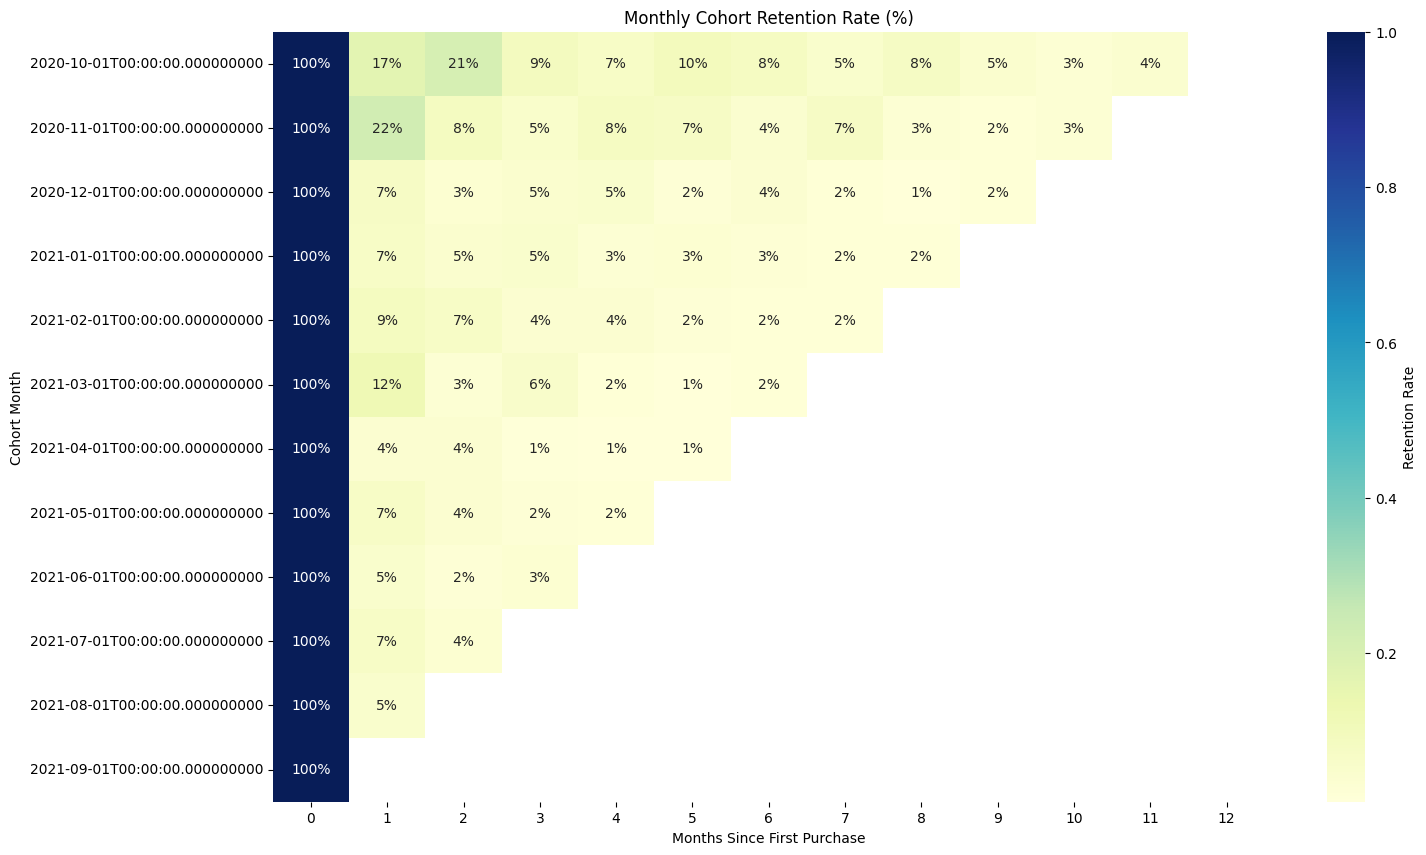

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert your retention_matrix to pandas
plot_df = retention_matrix.toPandas().set_index('cohort_month')

plt.figure(figsize=(16, 10))
sns.heatmap(plot_df, annot=True, fmt=".0%", cmap="YlGnBu", cbar_kws={'label': 'Retention Rate'})
plt.title('Monthly Cohort Retention Rate (%)')
plt.ylabel('Cohort Month')
plt.xlabel('Months Since First Purchase')
plt.show()

## Step 11.b: Forming Matplotlib line chart


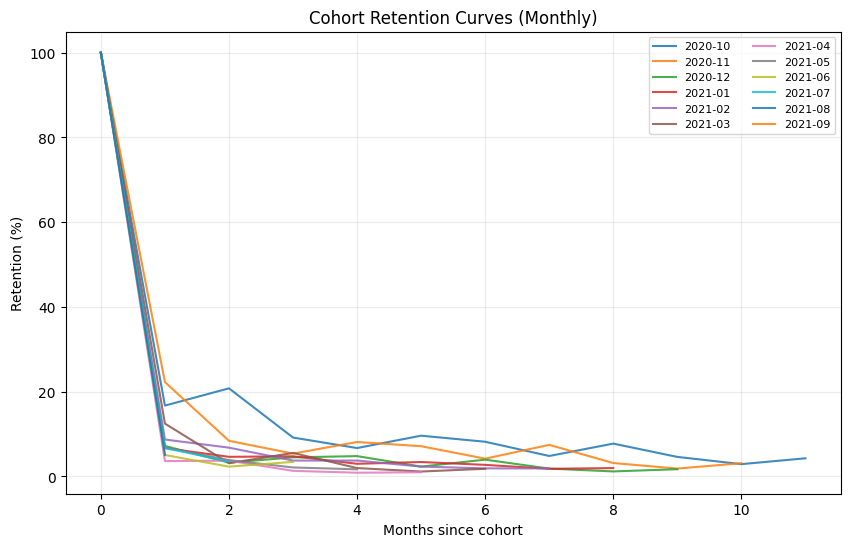

In [0]:
from pyspark.sql.functions import col

import matplotlib.pyplot as plt



# Keep a 0–12 month horizon

ret_curves = retention.filter(col("months_since_cohort").between(0, 12)) 



# Convert to pandas for quick plotting

pdf = (ret_curves

       .orderBy("cohort_month", "months_since_cohort")

       .toPandas())



# Basic line chart: one line per cohort

plt.figure(figsize=(10, 6))

for cohort, grp in pdf.groupby("cohort_month"):

    plt.plot(grp["months_since_cohort"], grp["retention_rate"] * 100,

             label=str(cohort)[:7], alpha=0.85)

plt.title("Cohort Retention Curves (Monthly)")

plt.xlabel("Months since cohort")

plt.ylabel("Retention (%)")

plt.grid(alpha=0.25)

plt.legend(ncol=2, fontsize=8)

plt.show()

## Step 12: Create KPI Table for Key Retention Milestones (M1, M3, M6, M12)
### What this step does:
This step builds a compact KPI table that summarizes retention at the most important lifecycle points:

- Month 1 (M1): Early retention — shows immediate drop‑off
- Month 3 (M3): Medium‑term engagement
- Month 6 (M6): Long‑term loyalty
- Month 12 (M12): One‑year retention

These KPIs help business teams quickly understand how well each cohort is performing without needing to look at the full heatmap or line chart.

#### How it works:

- Filter retention data to keep only months 1, 3, 6, and 12.
- Pivot the numbers so each cohort becomes one row with four columns (M1, M3, M6, M12).
- Rename the columns for readability.
- Order results by cohort_month.
- Display the final KPI table.

In [0]:
from pyspark.sql import functions as F

# Keep only the milestone months
kpis = (
    retention
      .filter(F.col("months_since_cohort").isin(1, 3, 6, 12))
      .groupBy("cohort_month")
      .pivot("months_since_cohort", [1, 3, 6, 12])
      .agg(F.first("retention_rate"))
      .withColumnRenamed("1",  "M1")
      .withColumnRenamed("3",  "M3")
      .withColumnRenamed("6",  "M6")
      .withColumnRenamed("12", "M12")
      .orderBy("cohort_month")
)

display(kpis)

cohort_month M1 M3 M6 M12 2020-10-01T00:00:00.000Z 0.16730875068794718 0.09190974133186572 0.08200330214639516 null 2020-11-01T00:00:00.000Z 0.2227958697378872 0.054011119936457505 0.04209690230341541 null 2020-12-01T00:00:00.000Z 0.07199942914228628 0.045169116597688026 0.039745968317396886 null 2021-01-01T00:00:00.000Z 0.0670886075949367 0.04767932489451477 0.027426160337552744 null 2021-02-01T00:00:00.000Z 0.08723404255319149 0.0375886524822695 0.019148936170212766 null 2021-03-01T00:00:00.000Z 0.12485022765396597 0.055595494847831294 0.01821231727773784 null 2021-04-01T00:00:00.000Z 0.03636102328255246 0.013365909744179363 null null 2021-05-01T00:00:00.000Z 0.0686657974793568 0.021295089091699262 null null 2021-06-01T00:00:00.000Z 0.0507399577167019 0.03453136011275546 null null 2021-07-01T00:00:00.000Z 0.06723283793347487 null null null 2021-08-01T00:00:00.000Z 0.051194539249146756 null null null

## Step 13: Persist Outputs as Delta Tables (for Dashboards & Reuse)
### What this step does:
We save the final analysis tables to a managed Delta database so you can query them later from SQL dashboards (without rerunning the whole notebook) and safely continue work tomorrow.

- Creates a lightweight schema (database) named analytics if it doesn’t exist.
- Saves three key tables:

       analytics.retention_long → long format with cohort_month, months_since_cohort, retention_rate (perfect for heatmaps & line charts).

       analytics.retention_matrix → pivoted matrix (rows = cohort months, columns = months since).

       analytics.retention_kpis → milestone KPIs (M1, M3, M6, M12) per cohort.

These persist in the metastore so you can open Catalog → Workspace → analytics
 (or run SELECT * FROM WORKSPACE.
analytics.<table>) anytime, including in SQL Dashboard tiles.

In [0]:
# Create a lightweight schema to store our outputs
spark.sql("CREATE DATABASE IF NOT EXISTS analytics")

# Save three handy tables
retention.write.mode("overwrite").format("delta").saveAsTable("analytics.retention_long")
retention_matrix.write.mode("overwrite").format("delta").saveAsTable("analytics.retention_matrix")
kpis.write.mode("overwrite").format("delta").saveAsTable("analytics.retention_kpis")

## Step 14: Verify That Delta Tables Were Saved Correctly
### What this step does:
This final step confirms that all the Delta tables we saved (retention_long, retention_matrix, retention_kpis) are correctly stored in the analytics database and can be queried later—especially from SQL Dashboards.
It ensures your work is fully persistent and you can safely return tomorrow without re‑running your entire notebook.
#### Breakdown:

Show all databases to confirm that the analytics schema exists.
Show all tables inside analytics to ensure the three Delta tables were created.
Preview a few rows from each saved table to verify the content is correct and complete.
#### Why this matters:
These checks confirm that your results are now permanently stored in Databricks’ catalog, making them reusable for dashboards, future analysis, or continuation of the project without running the entire notebook again.

Storing as Delta Tables allows for downstream BI tools like PowerBI or Tableau to connect directly to the cleaned data.

In [0]:
# List databases (schemas)
spark.sql("SHOW DATABASES").show(truncate=False)

# List tables in the 'analytics' database
spark.sql("SHOW TABLES IN analytics").show(truncate=False)

# Preview a few rows from each table
display(spark.table("analytics.retention_long").limit(10))
display(spark.table("analytics.retention_matrix").limit(10))
display(spark.table("analytics.retention_kpis").limit(10))

+------------------+
|databaseName      |
+------------------+
|analytics         |
|default           |
|information_schema|
+------------------+

+---------+----------------+-----------+
|database |tableName       |isTemporary|
+---------+----------------+-----------+
|analytics|retention_kpis  |false      |
|analytics|retention_long  |false      |
|analytics|retention_matrix|false      |
+---------+----------------+-----------+



cohort_month months_since_cohort active_customers cohort_size retention_rate 2020-10-01T00:00:00.000Z 0 1817 1817 1.0 2020-10-01T00:00:00.000Z 1 304 1817 0.16730875068794718 2020-10-01T00:00:00.000Z 2 378 1817 0.20803522289488166 2020-10-01T00:00:00.000Z 3 167 1817 0.09190974133186572 2020-10-01T00:00:00.000Z 4 122 1817 0.06714364336818933 2020-10-01T00:00:00.000Z 5 175 1817 0.09631260319207485 2020-10-01T00:00:00.000Z 6 149 1817 0.08200330214639516 2020-10-01T00:00:00.000Z 7 88 1817 0.048431480462300495 2020-10-01T00:00:00.000Z 8 141 1817 0.07760044028618603 2020-10-01T00:00:00.000Z 9 84 1817 0.04623004953219593

cohort_month 0 1 2 3 4 5 6 7 8 9 10 11 12 2020-10-01T00:00:00.000Z 1.0 0.16730875068794718 0.20803522289488166 0.09190974133186572 0.06714364336818933 0.09631260319207485 0.08200330214639516 0.048431480462300495 0.07760044028618603 0.04623004953219593 0.029168959823885527 0.04292790313703908 null 2020-11-01T00:00:00.000Z 1.0 0.2227958697378872 0.08419380460683082 0.054011119936457505 0.08141382049245433 0.07148530579825259 0.04209690230341541 0.07466243050039714 0.03177124702144559 0.018665607625099286 0.03137410643367752 null null 2020-12-01T00:00:00.000Z 1.0 0.07199942914228628 0.03268160411017554 0.045169116597688026 0.04809476238047666 0.02333380904809476 0.039745968317396886 0.018624232909947195 0.011988011988011988 0.017197088625660054 null null null 2021-01-01T00:00:00.000Z 1.0 0.0670886075949367 0.046413502109704644 0.04767932489451477 0.029957805907172997 0.03417721518987342 0.027426160337552744 0.018143459915611813 0.019831223628691982 null null null null 2021-02-01T00:00:00.000Z 1.0 0.08723404255319149 0.06808510638297872 0.0375886524822695 0.0375886524822695 0.023404255319148935 0.019148936170212766 0.019148936170212766 null null null null null 2021-03-01T00:00:00.000Z 1.0 0.12485022765396597 0.031392283728732324 0.055595494847831294 0.019889767553318956 0.011742151929067817 0.01821231727773784 null null null null null null 2021-04-01T00:00:00.000Z 1.0 0.03636102328255246 0.03736705949985628 0.013365909744179363 0.008910606496119574 0.01006036217303823 null null null null null null null 2021-05-01T00:00:00.000Z 1.0 0.0686657974793568 0.03867883528900478 0.021295089091699262 0.01694915254237288 null null null null null null null null 2021-06-01T00:00:00.000Z 1.0 0.0507399577167019 0.023255813953488372 0.03453136011275546 null null null null null null null null null 2021-07-01T00:00:00.000Z 1.0 0.06723283793347487 0.035385704175513094 null null null null null null null null null null

cohort_month M1 M3 M6 M12 2020-10-01T00:00:00.000Z 0.16730875068794718 0.09190974133186572 0.08200330214639516 null 2020-11-01T00:00:00.000Z 0.2227958697378872 0.054011119936457505 0.04209690230341541 null 2020-12-01T00:00:00.000Z 0.07199942914228628 0.045169116597688026 0.039745968317396886 null 2021-01-01T00:00:00.000Z 0.0670886075949367 0.04767932489451477 0.027426160337552744 null 2021-02-01T00:00:00.000Z 0.08723404255319149 0.0375886524822695 0.019148936170212766 null 2021-03-01T00:00:00.000Z 0.12485022765396597 0.055595494847831294 0.01821231727773784 null 2021-04-01T00:00:00.000Z 0.03636102328255246 0.013365909744179363 null null 2021-05-01T00:00:00.000Z 0.0686657974793568 0.021295089091699262 null null 2021-06-01T00:00:00.000Z 0.0507399577167019 0.03453136011275546 null null 2021-07-01T00:00:00.000Z 0.06723283793347487 null null null

## Step 15: Query the Retention Matrix for Dashboard Visualization (SQL Tile)
### What this step does:
This SQL query retrieves the full retention matrix table we saved earlier (analytics.retention_matrix).
It’s used in your SQL Dashboard tile to generate the cohort retention heatmap.

We sort the results by cohort_month so the heatmap shows cohorts in chronological order.

#### Why this matters:
The retention matrix is the core dataset behind your heatmap visualization.
Each row represents a cohort, and each column (0 to 12) represents months since first purchase.
This structured layout makes it easy for the dashboard to generate the heatmap.

In [0]:
%sql
SELECT *
FROM WORKSPACE.analytics.retention_matrix
ORDER BY cohort_month;

cohort_month 0 1 2 3 4 5 6 7 8 9 10 11 12 2020-10-01T00:00:00.000Z 1.0 0.16730875068794718 0.20803522289488166 0.09190974133186572 0.06714364336818933 0.09631260319207485 0.08200330214639516 0.048431480462300495 0.07760044028618603 0.04623004953219593 0.029168959823885527 0.04292790313703908 null 2020-11-01T00:00:00.000Z 1.0 0.2227958697378872 0.08419380460683082 0.054011119936457505 0.08141382049245433 0.07148530579825259 0.04209690230341541 0.07466243050039714 0.03177124702144559 0.018665607625099286 0.03137410643367752 null null 2020-12-01T00:00:00.000Z 1.0 0.07199942914228628 0.03268160411017554 0.045169116597688026 0.04809476238047666 0.02333380904809476 0.039745968317396886 0.018624232909947195 0.011988011988011988 0.017197088625660054 null null null 2021-01-01T00:00:00.000Z 1.0 0.0670886075949367 0.046413502109704644 0.04767932489451477 0.029957805907172997 0.03417721518987342 0.027426160337552744 0.018143459915611813 0.019831223628691982 null null null null 2021-02-01T00:00:00.000Z 1.0 0.08723404255319149 0.06808510638297872 0.0375886524822695 0.0375886524822695 0.023404255319148935 0.019148936170212766 0.019148936170212766 null null null null null 2021-03-01T00:00:00.000Z 1.0 0.12485022765396597 0.031392283728732324 0.055595494847831294 0.019889767553318956 0.011742151929067817 0.01821231727773784 null null null null null null 2021-04-01T00:00:00.000Z 1.0 0.03636102328255246 0.03736705949985628 0.013365909744179363 0.008910606496119574 0.01006036217303823 null null null null null null null 2021-05-01T00:00:00.000Z 1.0 0.0686657974793568 0.03867883528900478 0.021295089091699262 0.01694915254237288 null null null null null null null null 2021-06-01T00:00:00.000Z 1.0 0.0507399577167019 0.023255813953488372 0.03453136011275546 null null null null null null null null null 2021-07-01T00:00:00.000Z 1.0 0.06723283793347487 0.035385704175513094 null null null null null null null null null null 2021-08-01T00:00:00.000Z 1.0 0.051194539249146756 null null null null null null null null null null null 2021-09-01T00:00:00.000Z 1.0 null null null null null null null null null null null null